# Machine Learning in *sklearn* and *TensorFlow*: Data Exploration, Feature Selection, and Model Fitting

This notebook demonstrates a potential workflow for data exploration and Machine Learning model creation in Python using *sklearn* and *TensorFlow / Keras*.

## Data Integrity Check and Exploration

This section contains several methods for the descriptive statistical analysis of datasets.
Purpose: exploration and preparation of data for modeling.

The script loads the Boston House Prices dataset from the *sklearn* package per default.

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load demo dataset
from sklearn.datasets import load_boston
dataset = load_boston()

Print dataset description:

In [3]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Convert dataset to Pandas DataFrame (DF), add target data as new column, and check DF head:

In [4]:
data_df = pd.DataFrame(data=dataset['data'])
if hasattr(dataset, 'feature_names'):
    data_df.columns=dataset['feature_names']
else:
    print("Please specify the feature names manually!")
data_df['TARGET'] = dataset['target']
print(data_df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  TARGET  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


*Print DF statistics:*
- distribution of data
- sample count
- type of data

In [5]:
data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
TARGET     506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


*Count null values per feature:*

In [7]:
# count null values per feature:
print(data_df.isnull().sum())

# drop null values if present:
unprocessed_length = len(data_df)
data_df = data_df.dropna()
processed_length = len(data_df)
print(f"\nUnprocessed DF length: {unprocessed_length}, processed DF length: {processed_length}, dropped instances: {unprocessed_length - processed_length}.")

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

Unprocessed DF length: 506, processed DF length: 506, dropped instances: 0.


Here, we eliminate all rows containing null values. It may sometimes be useful to replace some of the values by standard values instead to keep the rows for data fitting.

*Correlation/distribution preview:*

Plot Scatter Matrix of Data (visualization of correlations and distributions for each feature combination):

<Figure size 432x288 with 0 Axes>

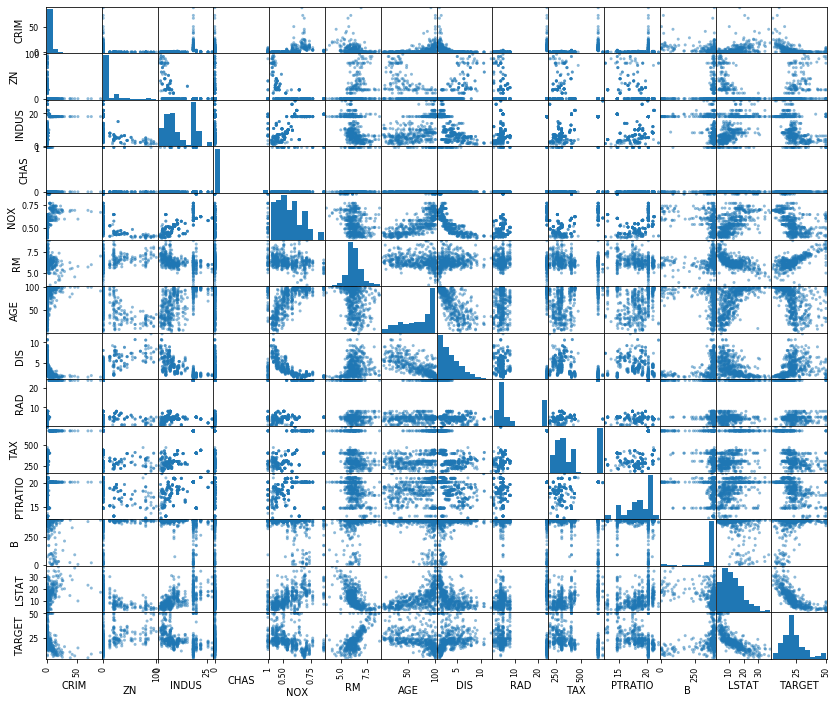

In [8]:
fig = plt.figure()
pd.plotting.scatter_matrix(data_df, figsize=((14, 12)))
plt.show()

*Create correlation matrix and plot it as a heatmap:*
- highly (positively or negatively) correlated features may contain redundant information - potential targets for removal for more efficient modeling / predictions
- desired: features with a high correlation to the target

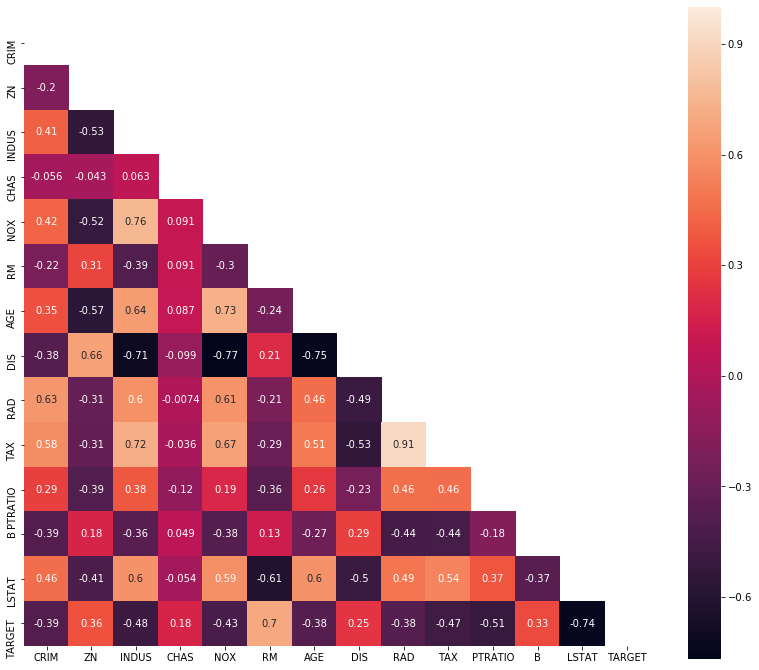

In [9]:
correlations = data_df.corr()

# show only the lower left triangle of the heatmap (avoid duplicate values):
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(14, 12))
sns.heatmap(correlations, square=True, annot=True, mask=mask)  # switch off annot to hide the values
plt.show()

We could, e.g., use this information to eliminate features with a very low correlation to the target. We will, however, proceed with all features in this example.

*Plot distribution information:*

Issues with the distribution may lead to problems during model fitting. This may be compensated by data transformation and/or under-/oversampling of data.

- a) box and whisker plot
- b) histograms

*a) Box and Whisker Plot:*

This plot type provides an overview on the distribution on the majority of values per feature and is suitable to identify outliers, which potentially interfere with model creation.

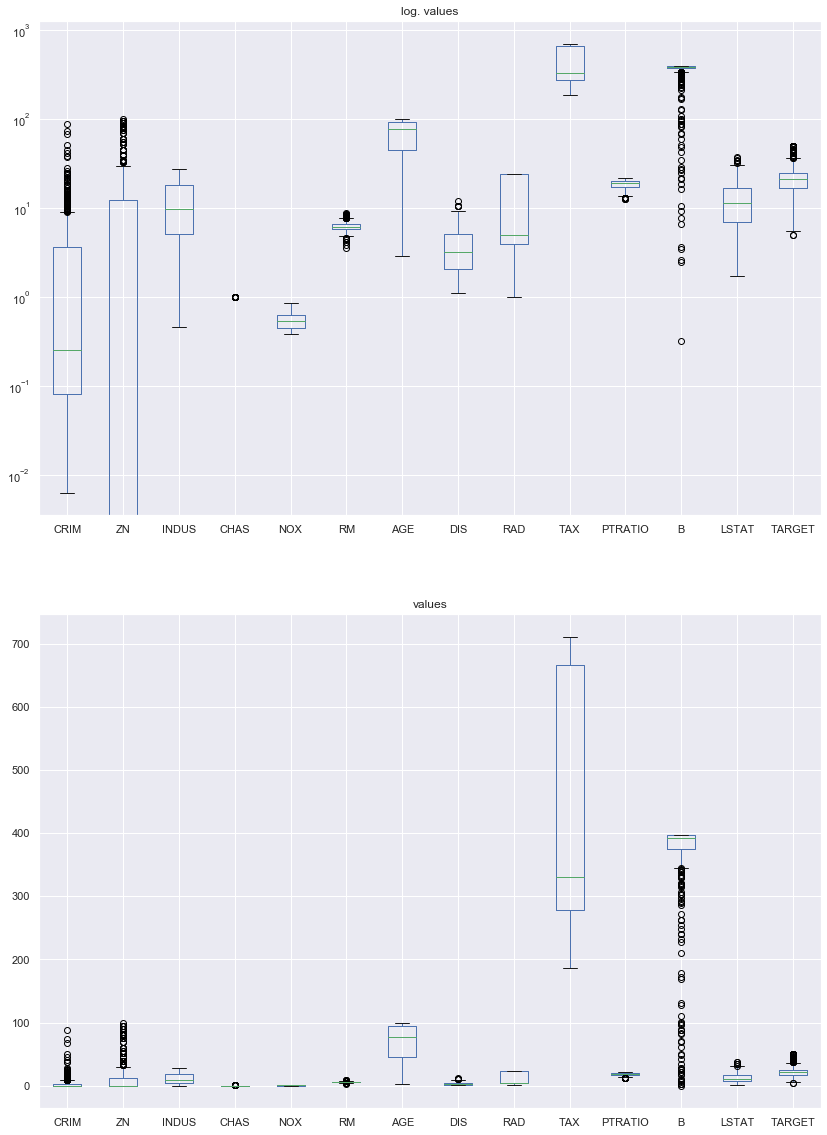

In [10]:
# a) box and whisker plot
sns.set()  # use Seaborn Standard Formatting from here on

fig, ax = plt.subplots(2, 1)
data_df.plot(kind='box', logy=True, figsize=(14,20), ax=ax[0], title='log. values')
data_df.plot(kind='box', logy=False, figsize=(14,20), ax=ax[1], title='values')
plt.show()

*b) Histograms:*

Histograms provide accurate information on the distribution of the values for each feature, e.g., regarding its width, skewness, and kurtosis.

<Figure size 432x288 with 0 Axes>

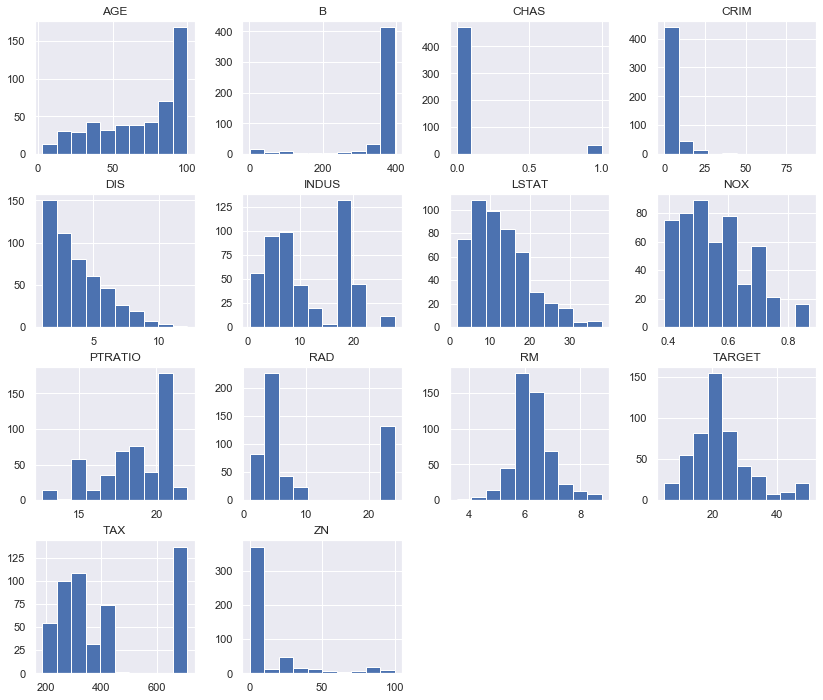

In [11]:
# b) histograms
fig = plt.figure()
data_df.hist(figsize=(14, 12))
plt.show()

## Data preprocessing
Let's exemplarily transform the LSTAT via power transformation and DIS and NOX via log transformation. This will reduce the skewness of the distribution and thus move it closer to a normal distribution.

**NOTE:** we will perform the transformations on a separate copy of the data DataFrame, because we will use a Random Forest Regressor lateron, which doesn't require scaling and for which this step may even cause negative effects.

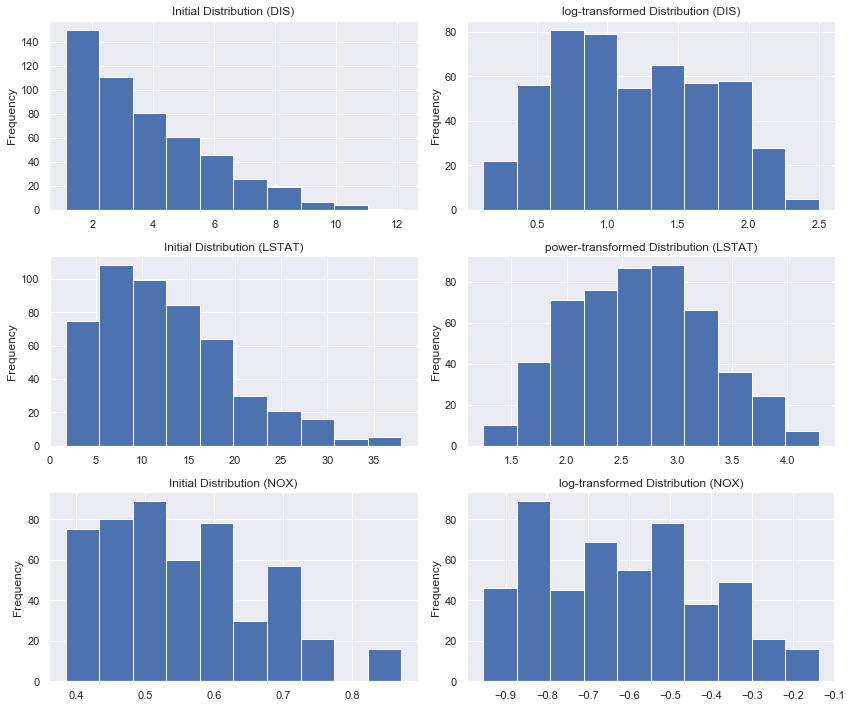

In [12]:
# save a copy of the untransformed DF:
data_df_original = data_df.copy()

# data transformation:
col1 = 'DIS'
col2 = 'LSTAT'
col3 = 'NOX'

data_df[f'{col1} log'] = np.log(data_df[col1])
data_df[f'{col2} pow'] = np.power(data_df[col2], 0.4)
data_df[f'{col3} log'] = np.log(data_df[col3])

# plot the results:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12,10))

# initial histograms:
data_df[col1].plot.hist(ax=ax[0, 0], title=f'Initial Distribution ({col1})')
data_df[col2].plot.hist(ax=ax[1, 0], title=f'Initial Distribution ({col2})')
data_df[col3].plot.hist(ax=ax[2, 0], title=f'Initial Distribution ({col3})')

# transformed histograms:
data_df[f'{col1} log'].plot.hist(ax=ax[0, 1], title=f'log-transformed Distribution ({col1})')
data_df[f'{col2} pow'].plot.hist(ax=ax[1, 1], title=f'power-transformed Distribution ({col2})')
data_df[f'{col3} log'].plot.hist(ax=ax[2, 1], title=f'log-transformed Distribution ({col3})')

plt.tight_layout()
plt.show()

Let's drop the untransformed feature columns:

In [13]:
data_df.drop(['DIS', 'LSTAT', 'NOX'], axis=1, inplace=True)

Finally, let's scale the features using sklearn's *StandardScaler*:

<Figure size 432x288 with 0 Axes>

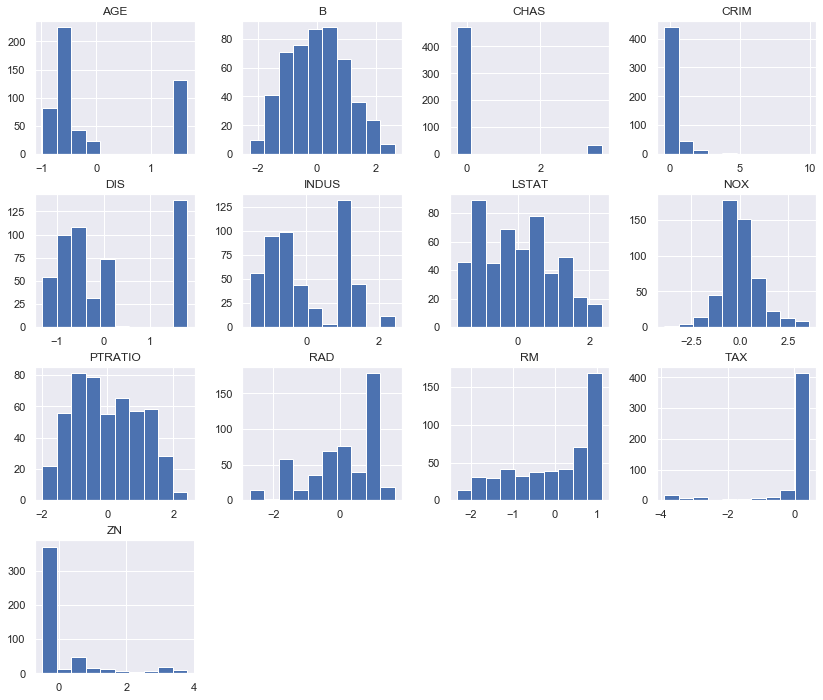

In [14]:
from sklearn.preprocessing import StandardScaler

# temporarily remove the target to exclude it from scaling:
target = data_df['TARGET']
data_df.drop('TARGET', axis=1, inplace=True)

sds = StandardScaler()
scaled_data = sds.fit_transform(data_df)  # this will return a numpy array
# recreate DF:
data_df = pd.DataFrame(data=scaled_data, columns=dataset['feature_names'])

fig = plt.figure()
data_df.hist(figsize=(14, 12))
plt.show()

# reappend Target to DF:
data_df['TARGET'] = target

Note that corresponding transformations have to be performed on unseen data as well for predictions using the final model!
The StandardScaler can be included in a model pipeline.

## Model creation and fit

The following steps create the actual model and fit it to the data. The workflow assumes that the target is numeric, i.e., Regressor Models will be used for the fit.

Two models will be used:
- Random Forest Regressor (i.e., an ensemble of multiple Decision Trees)
- K-nearest Neighbors Regressor

In [15]:
# import scikit learn packages:
# data preprocessing:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# models:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.neighbors import KNeighborsRegressor as KNR

Shuffle the DataFrame and split it into 20% Test Set and 80% Training Set:

In [16]:
# processing of scaled and transformed DF:
data_df = shuffle(data_df)
train_df, test_df = train_test_split(data_df, test_size=0.2)

# split dataframes into features and targets:
if hasattr(dataset, 'feature_names'):
    train_data = train_df[dataset['feature_names']]
    test_data = test_df[dataset['feature_names']]
else:
    print("Please provide the feature names manually!")
    
train_target = train_df['TARGET']
test_target = test_df['TARGET']

# processing of original DF:
data_df_original = shuffle(data_df_original)
train_df_original, test_df_original = train_test_split(data_df_original, test_size=0.2)

# split dataframes into features and targets:
if hasattr(dataset, 'feature_names'):
    train_data_original = train_df_original[dataset['feature_names']]
    test_data_original = test_df_original[dataset['feature_names']]
else:
    print("Please provide the feature names manually!")
    
train_target_original = train_df_original['TARGET']
test_target_original = test_df_original['TARGET']

# create dictionary for the results of fitting and scoring:
res_dict = {}

Creation of and fit to the Random Forest Regressor:

In [17]:
# screening parameters - in this demonstration, the number of estimators and the tree depth will be varied:
n_estimators = [20, 50, 100]
max_depths = [2, 5, 10, 20]

for n_est in n_estimators:
    for max_dep in max_depths:
        current_identifier = f"RFR model (n_estimators: {n_est}, max_depth: {max_dep})"
        RFR_model = RFR(n_estimators=n_est, max_depth=max_dep)
        RFR_model.fit(train_data_original, train_target_original)
        train_score = RFR_model.score(train_data_original, train_target_original)
        test_score = RFR_model.score(test_data_original, test_target_original)
        res_dict[current_identifier] = {'model': RFR_model, 'train score': train_score, 'test score': test_score}

Creation of and fit to the K-nearest Neighbors Regressor:

In [18]:
# screening parameters - in this demonstration, only the number of neighbors will be varied:
n_neighbors = [2, 3, 5, 10]

for n_n in n_neighbors:
    current_identifier = f"KNR model (n_neighbors: {n_n})"
    KNR_model = KNR(n_neighbors=n_n)
    KNR_model.fit(train_data, train_target)
    train_score = KNR_model.score(train_data, train_target)
    test_score = KNR_model.score(test_data, test_target)
    res_dict[current_identifier] = {'model': KNR_model, 'train score': train_score, 'test score': test_score}

Iterate through results dictionary and create a results DataFrame:

In [19]:
res_df = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score'])

for key, value in res_dict.items():
    res_df = res_df.append({'Model': key,
                            'Test Score': round(res_dict[key]['test score'], 2),
                            'Train Score': round(res_dict[key]['train score'], 2)}, ignore_index=True)

# sort values by Test Score in descending order:
res_df.sort_values(by='Test Score', ascending=False, inplace=True)
res_df.reset_index(drop=True, inplace=True)

# print results:
print(res_df)

                                           Model  Train Score  Test Score
0   RFR model (n_estimators: 100, max_depth: 10)         0.98        0.90
1   RFR model (n_estimators: 100, max_depth: 20)         0.98        0.90
2    RFR model (n_estimators: 20, max_depth: 10)         0.98        0.89
3    RFR model (n_estimators: 20, max_depth: 20)         0.98        0.89
4    RFR model (n_estimators: 50, max_depth: 20)         0.98        0.89
5     RFR model (n_estimators: 20, max_depth: 5)         0.94        0.88
6     RFR model (n_estimators: 50, max_depth: 5)         0.94        0.88
7    RFR model (n_estimators: 50, max_depth: 10)         0.98        0.88
8    RFR model (n_estimators: 100, max_depth: 5)         0.94        0.88
9                     KNR model (n_neighbors: 2)         0.94        0.82
10    RFR model (n_estimators: 20, max_depth: 2)         0.75        0.80
11                    KNR model (n_neighbors: 3)         0.91        0.80
12    RFR model (n_estimators: 50, max

### Feature Importance:

*Create a plot of the Feature Importance based on the best-performing Random Forest Regressor:*

The Feature Importance denotes the proportion of the Target determined by the respective Feature.

<Figure size 432x288 with 0 Axes>

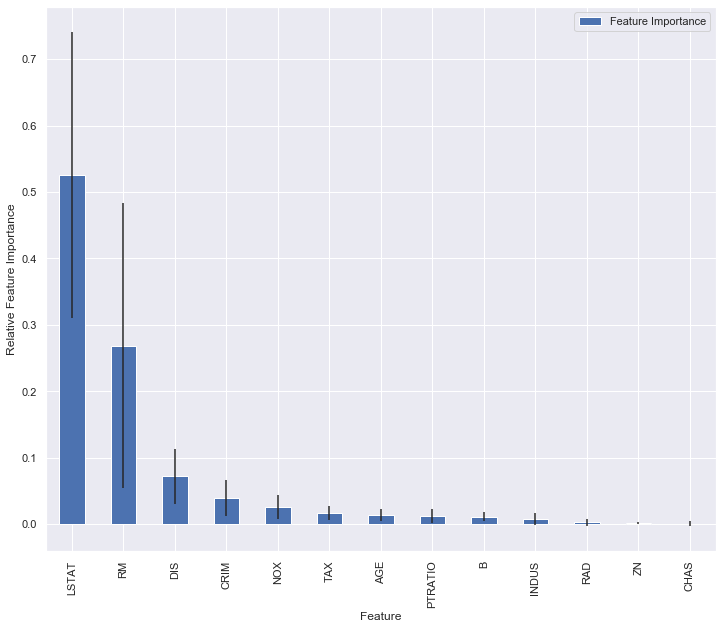

DataFrame of Feature Importance:

          Feature Importance     Stdev
LSTAT              0.526040  0.215336
RM                 0.268942  0.214039
DIS                0.072109  0.041376
CRIM               0.039287  0.026688
NOX                0.025836  0.017904
TAX                0.017304  0.010603
AGE                0.013994  0.009049
PTRATIO            0.012915  0.010693
B                  0.011134  0.006491
INDUS              0.007156  0.009026
RAD                0.003180  0.005384
ZN                 0.001162  0.001507
CHAS               0.000939  0.003402


In [20]:
# isolate identifier of best-performing Random Forest Regressor model:
for ind, row in res_df.iterrows():
    if 'RFR model' in row['Model']:
        identifier = row['Model']
        break

# isolate feature importances from model and create dictionary based on these values:
feature_imp_dict = dict(zip(dataset['feature_names'], res_dict[identifier]['model'].feature_importances_))
# isolate standard deviation for each feature importance across all tree models of the random forest:
std = np.std([tree.feature_importances_ for tree in res_dict[identifier]['model'].estimators_],
             axis=0)

# convert dictionary to DataFrame:
imp_df = pd.DataFrame.from_dict(data=feature_imp_dict, orient='index')
imp_df.columns = ['Feature Importance']
imp_df['Stdev'] = std

# sort values in descending order:
imp_df.sort_values(by='Feature Importance', inplace=True, ascending=False)

# create plot:
fig = plt.figure()
imp_df.plot.bar(figsize=(12, 10), yerr='Stdev')
plt.ylabel('Relative Feature Importance')
plt.xlabel('Feature')
plt.show()

# print Feature Importance DataFrame:
print("DataFrame of Feature Importance:\n\n", imp_df)

## Feature selection based on Feature Importance

We will select a feature subset from the RFR model via the *SelectFromModel* implemented in *scikit-learn*, based on a threshold of the Feature Importance of 0.03.

In [21]:
from sklearn.feature_selection import SelectFromModel

feature_selector_model = SelectFromModel(res_dict[identifier]['model'], threshold=0.03, prefit=True)  # using the RFR model selected above

# recompute the feature DF based on the important features:
initial_feature_number = len(train_data.iloc[0])
train_data_opt = feature_selector_model.transform(train_data_original)
test_data_opt = feature_selector_model.transform(test_data_original)
new_feature_number = len(train_data_opt[0])  # the procedure results in a numpy array

print(f"The number of features was reduced from {initial_feature_number} to {new_feature_number} based on Feature Importance.")

# refit a RFR model to the optimized datasets:
n_estimators = [20, 50, 100]
max_depths = [2, 5, 10, 20]
opt_RFR_dict = {}

for n_est in n_estimators:
    for max_dep in max_depths:
        current_identifier = f"optimized RFR model (n_estimators: {n_est}, max_depth: {max_dep})"
        RFR_model = RFR(n_estimators=n_est, max_depth=max_dep)
        RFR_model.fit(train_data_opt, train_target_original)
        train_score = RFR_model.score(train_data_opt, train_target_original)
        test_score = RFR_model.score(test_data_opt, test_target_original)
        opt_RFR_dict[current_identifier] = {'model': RFR_model, 'train score': train_score, 'test score': test_score}

# identify best-performing optimized RFR model:
test_score = 0
for key, value in opt_RFR_dict.items():
    if opt_RFR_dict[key]['test score'] > test_score:
        best_model = opt_RFR_dict[key]['model']
        test_score = opt_RFR_dict[key]['test score']
        train_score = opt_RFR_dict[key]['train score']
        parameters = key

print(f"\nThe optimized RFR model (parameters: {parameters}) yielded a score of {round(test_score, 2)} on the test dataset and a score of {round(train_score, 2)} on the train dataset.")

The number of features was reduced from 13 to 4 based on Feature Importance.

The optimized RFR model (parameters: optimized RFR model (n_estimators: 50, max_depth: 10)) yielded a score of 0.9 on the test dataset and a score of 0.97 on the train dataset.


Using the drastically reduced feature subset, we can nearly reach the same overall score! Especially for larger datasets, this step may

- reduce overfitting and thus improve the generalization of the model and
- reduce the computational load for predictions.

### Use the best-performing model for predictions and saving this model:

In [22]:
# load model and print model properties:
best_model = res_dict[res_df.iloc[0]['Model']]['model']
print(f"Best-performing model: {res_df.iloc[0]['Model']}.\nModel properties:\n {best_model}")

Best-performing model: RFR model (n_estimators: 100, max_depth: 10).
Model properties:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [23]:
# using the best-performing model for predictions:
# use first DF row as demo test dataset; replace this row by actual data for real predictions
test_dataset = np.array(data_df.iloc[0][:-1].values.reshape(1, -1))  
prediction = best_model.predict(test_dataset)  # provide data in form of an array
print(f"Features:\n{test_dataset}\n\n Model prediction: {prediction[0]}")

# note that we would have to apply the StandardScaler and the transformation methods used during Feature Transformation on
# actual data!

Features:
[[-0.37755242 -0.48772236 -0.18045756 -0.27259857  0.40227462  0.66587522
  -0.6379618  -0.61909395 -0.02567665  0.42778506  0.17353962 -0.35180028
   0.00605958]]

 Model prediction: 42.061000000000014


### Saving models for later use:

In [24]:
import joblib

joblib.dump(best_model, './sklearn-model.sav')
# re-load model with joblib.load(filepath)

['./sklearn-model.sav']

## Creating and fitting a Deep Neural Network using TensorFlow / Keras

Let's fit a simple TensorFlow Deep Neural Network to the data!

In [28]:
# import libraries:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as ker_back
from tensorflow.keras.callbacks import EarlyStopping

input_number = len(train_data.iloc[0])  # number of features = number of inputs to the first layer

# create the model:
model = Sequential()

# let's add several two fully connected layers with the size of the inputs to the model,
# followed by a layer with a decreased number of neurons, and finally one output layer:
model.add(Dense(input_number, input_shape=(input_number,), activation='relu'))
model.add(Dense(input_number, activation='relu'))
model.add(Dense(int(input_number/2), activation='relu'))  # the number of neurons per layer is reduced from this layer downwards
model.add(Dense(units=1))  # output layer: dimension is one, because we're dealing with a regression problem

# enable EarlyStopping, i.e., stop fitting at minimal validation loss, to avoid over-fitting of the model:
early_stopping = EarlyStopping(monitor='val_loss', patience=25, verbose=1, restore_best_weights=True)
# restore_best_weights allows us to use the network weights of the best-performing epoch, rather than the last one

# compile the model:
model.compile(loss='mean_squared_error',  # optimize by mean-squared error
              optimizer='adam')

# fit model:
# we are going to train for 500 epochs, i.e., cycle through our dataset 500 times (unless early stopping is triggered):
fit_data = model.fit(train_data, train_target, batch_size=16, epochs=500, validation_data=(test_data, test_target),
                     callbacks=[early_stopping])

Train on 404 samples, validate on 102 samples
Epoch 1/500
404/404 [==============================] - 0s 670us/sample - loss: 607.5185 - val_loss: 460.1185
Epoch 2/500
404/404 [==============================] - 0s 134us/sample - loss: 585.4192 - val_loss: 433.5193
Epoch 3/500
404/404 [==============================] - 0s 143us/sample - loss: 547.4416 - val_loss: 391.1499
Epoch 4/500
404/404 [==============================] - 0s 121us/sample - loss: 485.5401 - val_loss: 325.6413
Epoch 5/500
404/404 [==============================] - 0s 126us/sample - loss: 388.6403 - val_loss: 239.7995
Epoch 6/500
404/404 [==============================] - 0s 141us/sample - loss: 274.7738 - val_loss: 153.6721
Epoch 7/500
404/404 [==============================] - 0s 114us/sample - loss: 170.3550 - val_loss: 89.6737
Epoch 8/500
404/404 [==============================] - 0s 129us/sample - loss: 104.5963 - val_loss: 56.3903
Epoch 9/500
404/404 [==============================] - 0s 141us/sample - loss: 75.75

Epoch 75/500
404/404 [==============================] - 0s 119us/sample - loss: 10.1427 - val_loss: 11.6508
Epoch 76/500
404/404 [==============================] - 0s 106us/sample - loss: 10.0659 - val_loss: 11.5372
Epoch 77/500
404/404 [==============================] - 0s 105us/sample - loss: 9.9841 - val_loss: 11.7395
Epoch 78/500
404/404 [==============================] - 0s 106us/sample - loss: 10.0615 - val_loss: 11.3627
Epoch 79/500
404/404 [==============================] - 0s 109us/sample - loss: 10.0570 - val_loss: 11.4685
Epoch 80/500
404/404 [==============================] - 0s 126us/sample - loss: 10.0168 - val_loss: 11.9084
Epoch 81/500
404/404 [==============================] - 0s 124us/sample - loss: 9.8690 - val_loss: 11.5664
Epoch 82/500
404/404 [==============================] - 0s 116us/sample - loss: 9.7591 - val_loss: 11.3571
Epoch 83/500
404/404 [==============================] - 0s 119us/sample - loss: 9.6937 - val_loss: 11.7628
Epoch 84/500
404/404 [==========

404/404 [==============================] - 0s 131us/sample - loss: 7.8297 - val_loss: 10.3717
Epoch 152/500
404/404 [==============================] - 0s 134us/sample - loss: 7.9046 - val_loss: 10.3839
Epoch 153/500
404/404 [==============================] - 0s 114us/sample - loss: 7.7439 - val_loss: 10.7253
Epoch 154/500
404/404 [==============================] - 0s 104us/sample - loss: 7.7072 - val_loss: 10.1224
Epoch 155/500
404/404 [==============================] - 0s 109us/sample - loss: 7.7320 - val_loss: 10.8911
Epoch 156/500
404/404 [==============================] - 0s 121us/sample - loss: 7.9200 - val_loss: 10.1321
Epoch 157/500
404/404 [==============================] - 0s 156us/sample - loss: 7.9910 - val_loss: 10.0609
Epoch 158/500
404/404 [==============================] - 0s 126us/sample - loss: 7.6512 - val_loss: 10.1645
Epoch 159/500
404/404 [==============================] - 0s 111us/sample - loss: 7.5837 - val_loss: 10.0585
Epoch 160/500
404/404 [===================

404/404 [==============================] - 0s 134us/sample - loss: 6.1841 - val_loss: 9.8112
Epoch 228/500
404/404 [==============================] - 0s 115us/sample - loss: 6.1688 - val_loss: 10.7214
Epoch 229/500
404/404 [==============================] - 0s 122us/sample - loss: 6.3848 - val_loss: 9.9126
Epoch 00229: early stopping


### Visualize model training

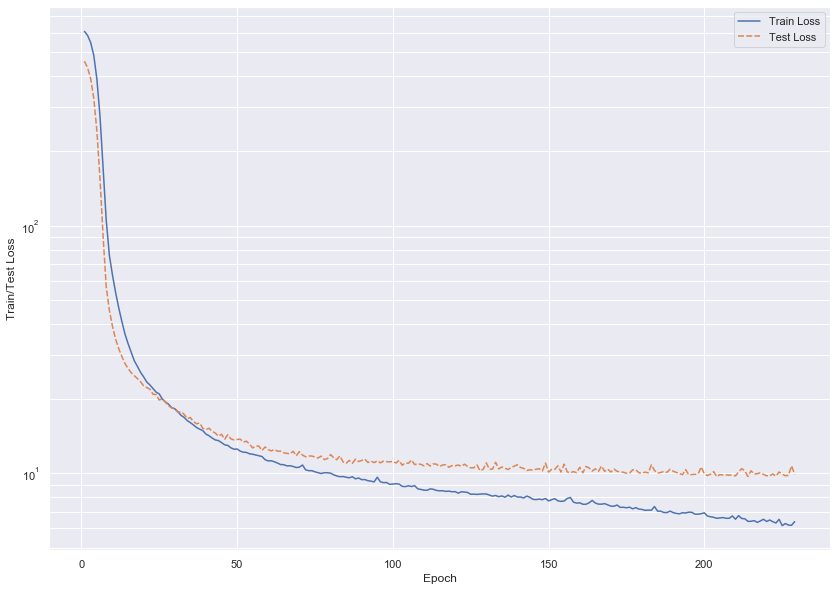

In [29]:
# requires seaborn version >= 0.9

# isolate data and create DataFrame:
train_loss = fit_data.history['loss']
test_loss = fit_data.history['val_loss']
epochs = np.arange(1, len(train_loss)+1)
fit_data_df = pd.DataFrame(data=np.column_stack((train_loss, test_loss)), columns=['Train Loss', 'Test Loss'],
                           index=epochs)

# create plot:
fig = plt.figure(figsize=(14, 10))
sns.lineplot(data=fit_data_df)
plt.yscale('log')  # set log scale for y axis
plt.xlabel('Epoch')
plt.ylabel('Train/Test Loss')
plt.grid(True, which='both')  # activate major and minor grid
plt.show()

### Evaluate Deep Neural Network performance

In [31]:
# evaluate deep neural network result based on the scikit-learn R^2 regression metric:
from sklearn.metrics import r2_score

# get predictions:
test_pred_target = model.predict(test_data)
train_pred_target = model.predict(train_data)
# get scores:
dnn_test_score = r2_score(test_target, test_pred_target)
dnn_train_score = r2_score(train_target, train_pred_target)

# print evaluation result:
print(f"\nResult of Deep Neural Network fitting: Train Score: {round(dnn_train_score, 2)}, Test Score: {round(dnn_test_score, 2)}.")


Result of Deep Neural Network fitting: Train Score: 0.93, Test Score: 0.82.


### Save the model

In [41]:
model.save('./dnn-model-new.sav')
# use model.load('filepath') for loading of saved models

INFO:tensorflow:Assets written to: ./dnn-model-new.sav\assets


Obviously, for most real-world applications, the Neural Network should be fine-tuned by methods like Grid Search regarding the number of layers, the neurons per layer, dropout properties, activation functions, etc.. However, this is out of scope for this demonstration.